(In order to load the stylesheet of this notebook, execute the last code cell in this notebook)

# Analyzing hotel ratings on Tripadvisor

In this homework we will focus on practicing two techniques: web scraping and regression. For the first part, we will build upon the sample code from the Lecture and attempt to get some basic information for each hotel. Then, we will fit a regression model on this information and try to analyze it.   

One of the main disadvantages of scraping a website instead of using an API is that, without any notice, the website may change its layout and render our code useless. Something like that happened in our case. Tripadvisor changed the layout of the buttons that we use to navigate between the different pages of the results. This was the main reason people were having problem with executing the code.

**Task 1 (20 pts)**

The first task of the homework is to fix the scraping code. We basically need to replace the part where we are checking if there is another page and getting its link with new code that reflects the new navigation layout. 

** Task 2 (30 pts)**

Then, for each hotel that our search returns, we will "click" (with the code of course) on it and scrape the information below.

![Information to be scraped](hotel_info.png)

Of course, feel free to collect even more data if you want. 

** Task 3 (20 pts) **

Now, we will use regression to analyze this information. First, we will fit a linear regression model that predicts the average rating. For example, for the hotel above, the average rating is

$$ \text{AVG_SCORE} = \frac{1*31 + 2*33 + 3*98 + 4*504 + 5*1861}{2527}$$

Use the model to analyze the important factors that decide the $\text{AVG_SCORE}$.

** Task 4 (30 pts) **

Finally, we will use logistic regression to decide if a hotel is _excellent_ or not. We classify a hotel as _excellent_ if more than **60%** of its ratings are 5 stars. This is a binary attribute on which we can fit a logistic regression model. As before, use the model to analyze the data.

-------

In order to use code from a Python script file, we need to put that file in the same folder as the notebook and import it as a library. Then, we will be able to access it's functions. For example, in the case of the lecture code, we could do the following:

``` python
import scrape_solution as scrape

scrape.get_city_page()
```

Of course, you might need to modify and restructure the code so that it returns what you need.

----

In [59]:
import scrape_solution1 as scrape
import time

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import scipy as sp
import scipy.sparse.linalg as linalg
import scipy.cluster.hierarchy as hr
from scipy.spatial.distance import pdist, squareform

import sklearn.datasets as datasets
import sklearn.metrics as metrics
import sklearn.utils as utils
import sklearn.linear_model as linear_model
import sklearn.cross_validation as cross_validation
import sklearn.cluster as cluster



from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import StandardScaler

import statsmodels.api as sm

from patsy import dmatrices

import seaborn as sns
%matplotlib inline

In [213]:
scrape.get_city_page("Boston","Massachusetts","data")

u'/Hotels-g60745-Boston_Massachusetts-Hotels.html'

In [214]:
#Task 1 - Fixes the scraper solution so that it goes through each page correctly
reload(scrape)
scrape.scrape_hotels("Boston","Massachusetts")



[u'/Hotel_Review-g60745-d94330-Reviews-Seaport_Boston_Hotel-Boston_Massachusetts.html', u'/Hotel_Review-g60745-d89620-Reviews-Hyatt_Boston_Harbor-Boston_Massachusetts.html', u'/Hotel_Review-g60745-d258705-Reviews-Hotel_Commonwealth-Boston_Massachusetts.html', u'/Hotel_Review-g60745-d89575-Reviews-Boston_Harbor_Hotel-Boston_Massachusetts.html', u'/Hotel_Review-g60745-d3225572-Reviews-EnVision_Hotel_Boston-Boston_Massachusetts.html', u'/Hotel_Review-g60745-d89600-Reviews-Revere_Hotel_Boston_Common-Boston_Massachusetts.html', u'/Hotel_Review-g60745-d114134-Reviews-Lenox_Hotel-Boston_Massachusetts.html', u'/Hotel_Review-g60745-d234752-Reviews-Nine_Zero_Hotel_a_Kimpton_Hotel-Boston_Massachusetts.html', u'/Hotel_Review-g60745-d313573-Reviews-Courtyard_by_Marriott_Boston_Copley_Square-Boston_Massachusetts.html', u'/Hotel_Review-g60745-d89617-Reviews-The_Westin_Copley_Place-Boston_Massachusetts.html', u'/Hotel_Review-g60745-d89599-Reviews-Omni_Parker_House-Boston_Massachusetts.html', u'/Hotel_

SystemExit: 

To exit: use 'exit', 'quit', or Ctrl-D.


Task 2

For the following, I created a global variable "review_page_urls" which is a list of the review pages for each hotel. I added to this list in "parse_hotellist_page" where for each page of hotels, I also grab the review link for each page.

Then in scrape_hotels, I had it print out the result of "review_page_urls" and copied and pasted the last result below so that I wouldn't have to run it each time to get the list. 

In [184]:
#Task 2 - Clicks through reviews for each hotel and retrieves ratings
reload(scrape)



all_reviews = [u'/Hotel_Review-g60745-d94330-Reviews-Seaport_Boston_Hotel-Boston_Massachusetts.html', u'/Hotel_Review-g60745-d89620-Reviews-Hyatt_Boston_Harbor-Boston_Massachusetts.html', u'/Hotel_Review-g60745-d258705-Reviews-Hotel_Commonwealth-Boston_Massachusetts.html', u'/Hotel_Review-g60745-d89575-Reviews-Boston_Harbor_Hotel-Boston_Massachusetts.html', u'/Hotel_Review-g60745-d3225572-Reviews-EnVision_Hotel_Boston-Boston_Massachusetts.html', u'/Hotel_Review-g60745-d89600-Reviews-Revere_Hotel_Boston_Common-Boston_Massachusetts.html', u'/Hotel_Review-g60745-d114134-Reviews-Lenox_Hotel-Boston_Massachusetts.html', u'/Hotel_Review-g60745-d234752-Reviews-Nine_Zero_Hotel_a_Kimpton_Hotel-Boston_Massachusetts.html', u'/Hotel_Review-g60745-d313573-Reviews-Courtyard_by_Marriott_Boston_Copley_Square-Boston_Massachusetts.html', u'/Hotel_Review-g60745-d89617-Reviews-The_Westin_Copley_Place-Boston_Massachusetts.html', u'/Hotel_Review-g60745-d89599-Reviews-Omni_Parker_House-Boston_Massachusetts.html', u'/Hotel_Review-g60745-d94337-Reviews-XV_Beacon-Boston_Massachusetts.html', u'/Hotel_Review-g60745-d268205-Reviews-Embassy_Suites_Boston_Logan_Airport-Boston_Massachusetts.html', u'/Hotel_Review-g60745-d647006-Reviews-The_Liberty_Hotel-Boston_Massachusetts.html', u'/Hotel_Review-g60745-d94350-Reviews-The_Midtown_Hotel-Boston_Massachusetts.html', u'/Hotel_Review-g60745-d6485213-Reviews-The_Verb_Hotel-Boston_Massachusetts.html', u'/Hotel_Review-g60745-d111421-Reviews-Copley_Square_Hotel-Boston_Massachusetts.html', u'/Hotel_Review-g60745-d94367-Reviews-Harborside_Inn-Boston_Massachusetts.html', u'/Hotel_Review-g60745-d89615-Reviews-Taj_Boston-Boston_Massachusetts.html', u'/Hotel_Review-g60745-d111428-Reviews-Hilton_Boston_Back_Bay-Boston_Massachusetts.html', u'/Hotel_Review-g60745-d111444-Reviews-The_Fairmont_Copley_Plaza_Boston-Boston_Massachusetts.html', u'/Hotel_Review-g60745-d114149-Reviews-The_Langham_Boston-Boston_Massachusetts.html', u'/Hotel_Review-g60745-d114150-Reviews-Millennium_Bostonian_Hotel-Boston_Massachusetts.html', u'/Hotel_Review-g60745-d94344-Reviews-Marriott_s_Custom_House-Boston_Massachusetts.html', u'/Hotel_Review-g60745-d620703-Reviews-InterContinental_Boston-Boston_Massachusetts.html', u'/Hotel_Review-g60745-d94372-Reviews-Boston_Hotel_Buckminster-Boston_Massachusetts.html', u'/Hotel_Review-g60745-d89602-Reviews-Sheraton_Boston_Hotel-Boston_Massachusetts.html', u'/Hotel_Review-g60745-d4325990-Reviews-Residence_Inn_Boston_Back_Bay_Fenway-Boston_Massachusetts.html', u'/Hotel_Review-g60745-d111416-Reviews-Boston_Marriott_Copley_Place-Boston_Massachusetts.html', u'/Hotel_Review-g60745-d321151-Reviews-Loews_Boston_Hotel-Boston_Massachusetts.html', u'/Hotel_Review-g60745-d111441-Reviews-Hyatt_Regency_Boston-Boston_Massachusetts.html', u'/Hotel_Review-g60745-d1486034-Reviews-W_Boston-Boston_Massachusetts.html', u'/Hotel_Review-g60745-d217550-Reviews-DoubleTree_by_Hilton_Hotel_Boston_Downtown-Boston_Massachusetts.html', u'/Hotel_Review-g60745-d94371-Reviews-Colonnade_Hotel-Boston_Massachusetts.html', u'/Hotel_Review-g60745-d89568-Reviews-Chandler_Inn-Boston_Massachusetts.html', u'/Hotel_Review-g60745-d549445-Reviews-Hotel_140-Boston_Massachusetts.html', u'/Hotel_Review-g60745-d77638-Reviews-The_Inn_at_Longwood_Medical-Boston_Massachusetts.html', u'/Hotel_Review-g60745-d120988-Reviews-Hilton_Boston_Logan_Airport-Boston_Massachusetts.html', u'/Hotel_Review-g60745-d94326-Reviews-Hilton_Boston_Downtown_Faneuil_Hall-Boston_Massachusetts.html', u'/Hotel_Review-g60745-d1201116-Reviews-Battery_Wharf_Hotel_Boston_Waterfront-Boston_Massachusetts.html', u'/Hotel_Review-g60745-d111417-Reviews-Boston_Marriott_Long_Wharf-Boston_Massachusetts.html', u'/Hotel_Review-g60745-d287606-Reviews-Onyx_Hotel_a_Kimpton_Hotel-Boston_Massachusetts.html', u'/Hotel_Review-g60745-d320038-Reviews-Hampton_Inn_Suites_Boston_Crosstown_Center-Boston_Massachusetts.html', u'/Hotel_Review-g60745-d121009-Reviews-Holiday_Inn_Express_Boston-Boston_Massachusetts.html', u'/Hotel_Review-g60745-d89585-Reviews-Four_Seasons_Hotel_Boston-Boston_Massachusetts.html', u'/Hotel_Review-g60745-d499916-Reviews-The_Boxer_Boston-Boston_Massachusetts.html', u'/Hotel_Review-g60745-d268207-Reviews-Residence_Inn_by_Marriott_Boston_Harbor_on_Tudor_Wharf-Boston_Massachusetts.html', u'/Hotel_Review-g60745-d94368-Reviews-DoubleTree_Club_by_Hilton_Hotel_Boston_Bayside-Boston_Massachusetts.html', u'/Hotel_Review-g60745-d217546-Reviews-Wyndham_Boston_Beacon_Hill-Boston_Massachusetts.html', u'/Hotel_Review-g60745-d77629-Reviews-BEST_WESTERN_University_Hotel_Boston_Brighton-Boston_Massachusetts.html', u'/Hotel_Review-g60745-d111423-Reviews-Eliot_Hotel-Boston_Massachusetts.html', u'/Hotel_Review-g60745-d595373-Reviews-The_Westin_Boston_Waterfront-Boston_Massachusetts.html', u'/Hotel_Review-g60745-d94399-Reviews-Club_Quarters_Boston-Boston_Massachusetts.html', u'/Hotel_Review-g60745-d120977-Reviews-Copley_House-Boston_Massachusetts.html', u'/Hotel_Review-g60745-d678412-Reviews-Renaissance_Boston_Waterfront_Hotel-Boston_Massachusetts.html', u'/Hotel_Review-g60745-d111422-Reviews-DoubleTree_Suites_by_Hilton_Boston_Cambridge-Boston_Massachusetts.html', u'/Hotel_Review-g60745-d111434-Reviews-Newbury_Guest_House-Boston_Massachusetts.html', u'/Hotel_Review-g60745-d222957-Reviews-BEST_WESTERN_PLUS_Roundhouse_Suites-Boston_Massachusetts.html', u'/Hotel_Review-g60745-d225873-Reviews-Charlesmark_Hotel-Boston_Massachusetts.html', u'/Hotel_Review-g60745-d1136705-Reviews-Mandarin_Oriental_Boston-Boston_Massachusetts.html']

scrape.parse_all_reviews(all_reviews)

scrape.task2_dict()

HERE


{u'BEST WESTERN PLUS Roundhouse Suites': {'Average': 129,
  'Business': 104,
  'Cleanliness': 4.0,
  'Couples': 179,
  'Excellent': 179,
  'Families': 257,
  'Location': 4.0,
  'Poor': 69,
  'Rooms': 4.0,
  'Service': 4.0,
  'Sleep Quality': 3.5,
  'Solo': 17,
  'Terrible': 34,
  'Value': 4.0,
  'Very good': 305},
 u'BEST WESTERN University Hotel Boston-Brighton': {'Average': 77,
  'Business': 49,
  'Cleanliness': 4.0,
  'Couples': 58,
  'Excellent': 97,
  'Families': 166,
  'Location': 4.0,
  'Poor': 33,
  'Rooms': 3.5,
  'Service': 4.0,
  'Sleep Quality': 4.0,
  'Solo': 27,
  'Terrible': 21,
  'Value': 4.0,
  'Very good': 132},
 u'Battery Wharf Hotel, Boston Waterfront': {'Average': 74,
  'Business': 128,
  'Cleanliness': 4.5,
  'Couples': 406,
  'Excellent': 560,
  'Families': 175,
  'Location': 4.5,
  'Poor': 24,
  'Rooms': 4.5,
  'Service': 4.5,
  'Sleep Quality': 4.5,
  'Solo': 51,
  'Terrible': 9,
  'Value': 4.0,
  'Very good': 196},
 u'Boston Harbor Hotel': {'Average': 44,
  'B

Task 2

I had scrape.task2_dict() return the dictionary, again I copied and pasted below so I wouldn't have to run it each time (it took about ~5mins to run) 

In [301]:
h2_dict = {u'BEST WESTERN PLUS Roundhouse Suites': {'Average': 129,
  'Business': 104,
  'Cleanliness': 4.0,
  'Couples': 179,
  'Excellent': 179,
  'Families': 257,
  'Location': 4.0,
  'Poor': 69,
  'Rooms': 4.0,
  'Service': 4.0,
  'Sleep Quality': 3.5,
  'Solo': 17,
  'Terrible': 34,
  'Value': 4.0,
  'Very good': 305},
 u'BEST WESTERN University Hotel Boston-Brighton': {'Average': 77,
  'Business': 49,
  'Cleanliness': 4.0,
  'Couples': 58,
  'Excellent': 97,
  'Families': 166,
  'Location': 4.0,
  'Poor': 33,
  'Rooms': 3.5,
  'Service': 4.0,
  'Sleep Quality': 4.0,
  'Solo': 27,
  'Terrible': 21,
  'Value': 4.0,
  'Very good': 132},
 u'Battery Wharf Hotel, Boston Waterfront': {'Average': 74,
  'Business': 128,
  'Cleanliness': 4.5,
  'Couples': 406,
  'Excellent': 560,
  'Families': 175,
  'Location': 4.5,
  'Poor': 24,
  'Rooms': 4.5,
  'Service': 4.5,
  'Sleep Quality': 4.5,
  'Solo': 51,
  'Terrible': 9,
  'Value': 4.0,
  'Very good': 196},
 u'Boston Harbor Hotel': {'Average': 44,
  'Business': 255,
  'Cleanliness': 5.0,
  'Couples': 462,
  'Excellent': 991,
  'Families': 284,
  'Location': 5.0,
  'Poor': 15,
  'Rooms': 4.5,
  'Service': 5.0,
  'Sleep Quality': 4.5,
  'Solo': 55,
  'Terrible': 11,
  'Value': 4.5,
  'Very good': 189},
 u'Boston Hotel Buckminster': {'Average': 149,
  'Business': 106,
  'Cleanliness': 4.0,
  'Couples': 275,
  'Excellent': 169,
  'Families': 178,
  'Location': 4.5,
  'Poor': 67,
  'Rooms': 3.5,
  'Service': 4.0,
  'Sleep Quality': 4.0,
  'Solo': 63,
  'Terrible': 70,
  'Value': 4.0,
  'Very good': 372},
 u'Boston Marriott Copley Place': {'Average': 332,
  'Business': 709,
  'Cleanliness': 4.5,
  'Couples': 466,
  'Excellent': 637,
  'Families': 440,
  'Location': 4.5,
  'Poor': 98,
  'Rooms': 4.0,
  'Service': 4.0,
  'Sleep Quality': 4.0,
  'Solo': 95,
  'Terrible': 35,
  'Value': 3.5,
  'Very good': 937},
 u'Boston Marriott Long Wharf': {'Average': 137,
  'Business': 253,
  'Cleanliness': 4.5,
  'Couples': 343,
  'Excellent': 607,
  'Families': 430,
  'Location': 5.0,
  'Poor': 49,
  'Rooms': 4.0,
  'Service': 4.5,
  'Sleep Quality': 4.0,
  'Solo': 38,
  'Terrible': 26,
  'Value': 3.5,
  'Very good': 466},
 u'Chandler Inn': {'Average': 110,
  'Business': 120,
  'Cleanliness': 4.5,
  'Couples': 367,
  'Excellent': 269,
  'Families': 77,
  'Location': 4.5,
  'Poor': 48,
  'Rooms': 4.0,
  'Service': 4.0,
  'Sleep Quality': 4.0,
  'Solo': 126,
  'Terrible': 25,
  'Value': 4.0,
  'Very good': 406},
 u'Charlesmark Hotel': {'Average': 71,
  'Business': 140,
  'Cleanliness': 4.5,
  'Couples': 304,
  'Excellent': 329,
  'Families': 44,
  'Location': 5.0,
  'Poor': 34,
  'Rooms': 4.0,
  'Service': 4.0,
  'Sleep Quality': 4.0,
  'Solo': 95,
  'Terrible': 18,
  'Value': 4.0,
  'Very good': 302},
 u'Club Quarters Boston': {'Average': 133,
  'Business': 239,
  'Cleanliness': 4.5,
  'Couples': 354,
  'Excellent': 415,
  'Families': 111,
  'Location': 4.5,
  'Poor': 49,
  'Rooms': 4.0,
  'Service': 4.0,
  'Sleep Quality': 4.0,
  'Solo': 112,
  'Terrible': 34,
  'Value': 4.0,
  'Very good': 419},
 u'Colonnade Hotel': {'Average': 160,
  'Business': 524,
  'Cleanliness': 4.5,
  'Couples': 614,
  'Excellent': 1275,
  'Families': 471,
  'Location': 5.0,
  'Poor': 63,
  'Rooms': 4.5,
  'Service': 4.5,
  'Sleep Quality': 4.5,
  'Solo': 103,
  'Terrible': 49,
  'Value': 4.0,
  'Very good': 511},
 u'Copley House': {'Average': 60,
  'Business': 67,
  'Cleanliness': 3.5,
  'Couples': 112,
  'Excellent': 109,
  'Families': 80,
  'Location': 4.5,
  'Poor': 32,
  'Rooms': 3.5,
  'Service': 3.5,
  'Sleep Quality': 3.5,
  'Solo': 37,
  'Terrible': 41,
  'Value': 4.0,
  'Very good': 137},
 u'Copley Square Hotel': {'Average': 101,
  'Business': 223,
  'Cleanliness': 4.5,
  'Couples': 416,
  'Excellent': 539,
  'Families': 188,
  'Location': 5.0,
  'Poor': 28,
  'Rooms': 4.0,
  'Service': 4.5,
  'Sleep Quality': 4.5,
  'Solo': 88,
  'Terrible': 15,
  'Value': 4.0,
  'Very good': 359},
 u'Courtyard by Marriott Boston Copley Square': {'Average': 43,
  'Business': 297,
  'Cleanliness': 4.5,
  'Couples': 222,
  'Excellent': 625,
  'Families': 229,
  'Location': 5.0,
  'Poor': 8,
  'Rooms': 4.5,
  'Service': 4.5,
  'Sleep Quality': 4.5,
  'Solo': 70,
  'Terrible': 11,
  'Value': 4.5,
  'Very good': 274},
 u'DoubleTree Club by Hilton Hotel Boston Bayside': {'Average': 227,
  'Business': 223,
  'Cleanliness': 4.0,
  'Couples': 247,
  'Excellent': 259,
  'Families': 234,
  'Location': 4.0,
  'Poor': 76,
  'Rooms': 4.0,
  'Service': 4.0,
  'Sleep Quality': 3.5,
  'Solo': 76,
  'Terrible': 37,
  'Value': 3.5,
  'Very good': 346},
 u'DoubleTree Suites by Hilton Boston-Cambridge': {'Average': 137,
  'Business': 292,
  'Cleanliness': 4.5,
  'Couples': 191,
  'Excellent': 390,
  'Families': 364,
  'Location': 4.0,
  'Poor': 58,
  'Rooms': 4.0,
  'Service': 4.0,
  'Sleep Quality': 4.0,
  'Solo': 68,
  'Terrible': 35,
  'Value': 4.0,
  'Very good': 443},
 u'DoubleTree by Hilton Hotel Boston - Downtown': {'Average': 61,
  'Business': 145,
  'Cleanliness': 4.5,
  'Couples': 110,
  'Excellent': 204,
  'Families': 113,
  'Location': 4.5,
  'Poor': 19,
  'Rooms': 4.5,
  'Service': 4.5,
  'Sleep Quality': 4.5,
  'Solo': 19,
  'Terrible': 8,
  'Value': 4.0,
  'Very good': 177},
 u'Eliot Hotel': {'Average': 65,
  'Business': 117,
  'Cleanliness': 4.5,
  'Couples': 206,
  'Excellent': 433,
  'Families': 223,
  'Location': 4.5,
  'Poor': 29,
  'Rooms': 4.5,
  'Service': 4.5,
  'Sleep Quality': 4.5,
  'Solo': 29,
  'Terrible': 23,
  'Value': 4.0,
  'Very good': 196},
 u'Embassy Suites Boston Logan Airport': {'Average': 216,
  'Business': 301,
  'Cleanliness': 4.5,
  'Couples': 306,
  'Excellent': 481,
  'Families': 427,
  'Location': 4.5,
  'Poor': 65,
  'Rooms': 4.0,
  'Service': 4.0,
  'Sleep Quality': 4.0,
  'Solo': 76,
  'Terrible': 40,
  'Value': 4.0,
  'Very good': 515},
 u'Four Seasons Hotel Boston': {'Average': 47,
  'Business': 317,
  'Cleanliness': 5.0,
  'Couples': 256,
  'Excellent': 810,
  'Families': 292,
  'Location': 5.0,
  'Poor': 22,
  'Rooms': 4.5,
  'Service': 5.0,
  'Sleep Quality': 5.0,
  'Solo': 47,
  'Terrible': 13,
  'Value': 4.0,
  'Very good': 140},
 u'Hampton Inn &amp; Suites Boston Crosstown Center': {'Average': 94,
  'Business': 161,
  'Cleanliness': 4.5,
  'Couples': 94,
  'Excellent': 202,
  'Families': 173,
  'Location': 4.0,
  'Poor': 34,
  'Rooms': 4.5,
  'Service': 4.0,
  'Sleep Quality': 3.5,
  'Solo': 56,
  'Terrible': 22,
  'Value': 4.0,
  'Very good': 213},
 u'Harborside Inn': {'Average': 98,
  'Business': 113,
  'Cleanliness': 4.5,
  'Couples': 544,
  'Excellent': 388,
  'Families': 87,
  'Location': 5.0,
  'Poor': 47,
  'Rooms': 4.0,
  'Service': 4.0,
  'Sleep Quality': 4.0,
  'Solo': 74,
  'Terrible': 41,
  'Value': 4.0,
  'Very good': 459},
 u'Hilton Boston Back Bay': {'Average': 282,
  'Business': 470,
  'Cleanliness': 4.5,
  'Couples': 458,
  'Excellent': 574,
  'Families': 412,
  'Location': 4.5,
  'Poor': 91,
  'Rooms': 4.0,
  'Service': 4.0,
  'Sleep Quality': 4.0,
  'Solo': 116,
  'Terrible': 27,
  'Value': 4.0,
  'Very good': 731},
 u'Hilton Boston Downtown / Faneuil Hall': {'Average': 161,
  'Business': 227,
  'Cleanliness': 4.5,
  'Couples': 251,
  'Excellent': 299,
  'Families': 205,
  'Location': 4.5,
  'Poor': 42,
  'Rooms': 4.0,
  'Service': 4.0,
  'Sleep Quality': 4.0,
  'Solo': 30,
  'Terrible': 30,
  'Value': 3.5,
  'Very good': 338},
 u'Hilton Boston Logan Airport': {'Average': 295,
  'Business': 602,
  'Cleanliness': 4.5,
  'Couples': 514,
  'Excellent': 684,
  'Families': 422,
  'Location': 4.5,
  'Poor': 85,
  'Rooms': 4.0,
  'Service': 4.0,
  'Sleep Quality': 4.5,
  'Solo': 192,
  'Terrible': 47,
  'Value': 3.5,
  'Very good': 856},
 u'Holiday Inn Express Boston': {'Average': 99,
  'Business': 78,
  'Cleanliness': 4.0,
  'Couples': 194,
  'Excellent': 133,
  'Families': 130,
  'Location': 4.0,
  'Poor': 27,
  'Rooms': 4.0,
  'Service': 4.0,
  'Sleep Quality': 3.5,
  'Solo': 38,
  'Terrible': 23,
  'Value': 4.0,
  'Very good': 254},
 u'Hotel 140': {'Average': 159,
  'Business': 147,
  'Cleanliness': 4.5,
  'Couples': 416,
  'Excellent': 317,
  'Families': 116,
  'Location': 4.5,
  'Poor': 55,
  'Rooms': 3.5,
  'Service': 4.0,
  'Sleep Quality': 4.0,
  'Solo': 108,
  'Terrible': 45,
  'Value': 4.0,
  'Very good': 389},
 u'Hotel Commonwealth': {'Average': 81,
  'Business': 585,
  'Cleanliness': 5.0,
  'Couples': 852,
  'Excellent': 2368,
  'Families': 911,
  'Location': 5.0,
  'Poor': 39,
  'Rooms': 5.0,
  'Service': 5.0,
  'Sleep Quality': 5.0,
  'Solo': 147,
  'Terrible': 13,
  'Value': 4.5,
  'Very good': 440},
 u'Hyatt Boston Harbor': {'Average': 165,
  'Business': 327,
  'Cleanliness': 4.5,
  'Couples': 335,
  'Excellent': 479,
  'Families': 239,
  'Location': 4.5,
  'Poor': 67,
  'Rooms': 4.0,
  'Service': 4.5,
  'Sleep Quality': 4.0,
  'Solo': 105,
  'Terrible': 33,
  'Value': 4.0,
  'Very good': 424},
 u'Hyatt Regency Boston': {'Average': 380,
  'Business': 470,
  'Cleanliness': 4.5,
  'Couples': 566,
  'Excellent': 622,
  'Families': 392,
  'Location': 4.5,
  'Poor': 133,
  'Rooms': 4.0,
  'Service': 4.0,
  'Sleep Quality': 4.0,
  'Solo': 114,
  'Terrible': 55,
  'Value': 3.5,
  'Very good': 736},
 u'InterContinental Boston': {'Average': 130,
  'Business': 475,
  'Cleanliness': 4.5,
  'Couples': 665,
  'Excellent': 1137,
  'Families': 382,
  'Location': 4.5,
  'Poor': 56,
  'Rooms': 4.5,
  'Service': 4.5,
  'Sleep Quality': 4.5,
  'Solo': 127,
  'Terrible': 47,
  'Value': 4.0,
  'Very good': 526},
 u'Lenox Hotel': {'Average': 107,
  'Business': 382,
  'Cleanliness': 5.0,
  'Couples': 986,
  'Excellent': 1881,
  'Families': 630,
  'Location': 5.0,
  'Poor': 45,
  'Rooms': 4.5,
  'Service': 5.0,
  'Sleep Quality': 4.5,
  'Solo': 143,
  'Terrible': 20,
  'Value': 4.5,
  'Very good': 509},
 u'Loews Boston Hotel': {'Average': 58,
  'Business': 150,
  'Cleanliness': 4.5,
  'Couples': 273,
  'Excellent': 475,
  'Families': 174,
  'Location': 4.5,
  'Poor': 15,
  'Rooms': 4.5,
  'Service': 4.5,
  'Sleep Quality': 4.5,
  'Solo': 22,
  'Terrible': 3,
  'Value': 4.0,
  'Very good': 215},
 u'Mandarin Oriental, Boston': {'Average': 20,
  'Business': 131,
  'Cleanliness': 5.0,
  'Couples': 114,
  'Excellent': 311,
  'Families': 78,
  'Location': 5.0,
  'Poor': 7,
  'Rooms': 4.5,
  'Service': 4.5,
  'Sleep Quality': 5.0,
  'Solo': 30,
  'Terrible': 6,
  'Value': 4.0,
  'Very good': 61},
 u'Marriott&#39;s Custom House': {'Average': 11,
  'Business': 45,
  'Cleanliness': 4.5,
  'Couples': 179,
  'Excellent': 379,
  'Families': 217,
  'Location': 5.0,
  'Poor': 12,
  'Rooms': 4.5,
  'Service': 4.5,
  'Sleep Quality': 4.5,
  'Solo': 15,
  'Terrible': 12,
  'Value': 4.0,
  'Very good': 146},
 u'Millennium Bostonian Hotel': {'Average': 116,
  'Business': 156,
  'Cleanliness': 4.5,
  'Couples': 415,
  'Excellent': 437,
  'Families': 187,
  'Location': 5.0,
  'Poor': 55,
  'Rooms': 4.0,
  'Service': 4.0,
  'Sleep Quality': 4.0,
  'Solo': 59,
  'Terrible': 33,
  'Value': 4.0,
  'Very good': 376},
 u'Newbury Guest House': {'Average': 44,
  'Business': 45,
  'Cleanliness': 4.5,
  'Couples': 200,
  'Excellent': 173,
  'Families': 64,
  'Location': 5.0,
  'Poor': 20,
  'Rooms': 4.0,
  'Service': 4.0,
  'Sleep Quality': 4.5,
  'Solo': 25,
  'Terrible': 14,
  'Value': 4.0,
  'Very good': 184},
 u'Nine Zero Hotel - a Kimpton Hotel': {'Average': 104,
  'Business': 322,
  'Cleanliness': 4.5,
  'Couples': 829,
  'Excellent': 1176,
  'Families': 328,
  'Location': 5.0,
  'Poor': 30,
  'Rooms': 4.5,
  'Service': 4.5,
  'Sleep Quality': 4.5,
  'Solo': 118,
  'Terrible': 19,
  'Value': 4.0,
  'Very good': 496},
 u'Omni Parker House': {'Average': 561,
  'Business': 1005,
  'Cleanliness': 4.5,
  'Couples': 1518,
  'Excellent': 2026,
  'Families': 919,
  'Location': 5.0,
  'Poor': 243,
  'Rooms': 4.0,
  'Service': 4.5,
  'Sleep Quality': 4.0,
  'Solo': 251,
  'Terrible': 134,
  'Value': 4.0,
  'Very good': 1487},
 u'Onyx Hotel - a Kimpton Hotel': {'Average': 109,
  'Business': 148,
  'Cleanliness': 4.5,
  'Couples': 371,
  'Excellent': 475,
  'Families': 173,
  'Location': 4.5,
  'Poor': 48,
  'Rooms': 4.0,
  'Service': 4.5,
  'Sleep Quality': 4.5,
  'Solo': 55,
  'Terrible': 22,
  'Value': 4.0,
  'Very good': 326},
 u'Renaissance Boston Waterfront Hotel': {'Average': 104,
  'Business': 371,
  'Cleanliness': 4.5,
  'Couples': 214,
  'Excellent': 336,
  'Families': 139,
  'Location': 4.5,
  'Poor': 34,
  'Rooms': 4.5,
  'Service': 4.5,
  'Sleep Quality': 4.0,
  'Solo': 62,
  'Terrible': 15,
  'Value': 4.0,
  'Very good': 382},
 u'Residence Inn Boston Back Bay / Fenway': {'Average': 22,
  'Business': 85,
  'Cleanliness': 5.0,
  'Couples': 85,
  'Excellent': 349,
  'Families': 195,
  'Location': 4.5,
  'Poor': 9,
  'Rooms': 4.5,
  'Service': 4.5,
  'Sleep Quality': 4.5,
  'Solo': 16,
  'Terrible': 3,
  'Value': 4.5,
  'Very good': 134},
 u'Residence Inn by Marriott Boston Harbor on Tudor Wharf': {'Average': 42,
  'Business': 71,
  'Cleanliness': 4.5,
  'Couples': 140,
  'Excellent': 277,
  'Families': 196,
  'Location': 4.5,
  'Poor': 14,
  'Rooms': 4.5,
  'Service': 4.5,
  'Sleep Quality': 4.5,
  'Solo': 25,
  'Terrible': 4,
  'Value': 4.0,
  'Very good': 182},
 u'Revere Hotel Boston Common': {'Average': 181,
  'Business': 298,
  'Cleanliness': 4.5,
  'Couples': 622,
  'Excellent': 1091,
  'Families': 445,
  'Location': 4.5,
  'Poor': 39,
  'Rooms': 4.5,
  'Service': 4.5,
  'Sleep Quality': 4.5,
  'Solo': 78,
  'Terrible': 17,
  'Value': 4.0,
  'Very good': 617},
 u'Seaport Boston Hotel': {'Average': 98,
  'Business': 1107,
  'Cleanliness': 5.0,
  'Couples': 550,
  'Excellent': 1875,
  'Families': 461,
  'Location': 4.5,
  'Poor': 33,
  'Rooms': 4.5,
  'Service': 4.5,
  'Sleep Quality': 4.5,
  'Solo': 108,
  'Terrible': 31,
  'Value': 4.5,
  'Very good': 506},
 u'Sheraton Boston Hotel': {'Average': 74,
  'Business': 202,
  'Cleanliness': 4.5,
  'Couples': 127,
  'Excellent': 196,
  'Families': 107,
  'Location': 4.5,
  'Poor': 19,
  'Rooms': 4.0,
  'Service': 4.0,
  'Sleep Quality': 4.5,
  'Solo': 17,
  'Terrible': 19,
  'Value': 4.0,
  'Very good': 223},
 u'Taj Boston': {'Average': 149,
  'Business': 244,
  'Cleanliness': 4.5,
  'Couples': 432,
  'Excellent': 508,
  'Families': 241,
  'Location': 5.0,
  'Poor': 83,
  'Rooms': 4.0,
  'Service': 4.0,
  'Sleep Quality': 4.5,
  'Solo': 76,
  'Terrible': 32,
  'Value': 4.0,
  'Very good': 373},
 u'The Boxer Boston': {'Average': 45,
  'Business': 56,
  'Cleanliness': 4.5,
  'Couples': 143,
  'Excellent': 171,
  'Families': 57,
  'Location': 4.5,
  'Poor': 8,
  'Rooms': 4.0,
  'Service': 4.5,
  'Sleep Quality': 4.5,
  'Solo': 18,
  'Terrible': 8,
  'Value': 4.0,
  'Very good': 133},
 u'The Fairmont Copley Plaza, Boston': {'Average': 157,
  'Business': 444,
  'Cleanliness': 4.5,
  'Couples': 558,
  'Excellent': 924,
  'Families': 316,
  'Location': 5.0,
  'Poor': 68,
  'Rooms': 4.0,
  'Service': 4.5,
  'Sleep Quality': 4.5,
  'Solo': 71,
  'Terrible': 29,
  'Value': 4.0,
  'Very good': 434},
 u'The Inn at Longwood Medical': {'Average': 96,
  'Business': 187,
  'Cleanliness': 4.0,
  'Couples': 100,
  'Excellent': 347,
  'Families': 237,
  'Location': 4.5,
  'Poor': 43,
  'Rooms': 4.0,
  'Service': 4.5,
  'Sleep Quality': 4.0,
  'Solo': 61,
  'Terrible': 39,
  'Value': 4.0,
  'Very good': 161},
 u'The Langham, Boston': {'Average': 112,
  'Business': 324,
  'Cleanliness': 4.5,
  'Couples': 559,
  'Excellent': 808,
  'Families': 248,
  'Location': 4.5,
  'Poor': 41,
  'Rooms': 4.5,
  'Service': 4.5,
  'Sleep Quality': 4.5,
  'Solo': 51,
  'Terrible': 29,
  'Value': 4.0,
  'Very good': 419},
 u'The Liberty Hotel': {'Average': 77,
  'Business': 173,
  'Cleanliness': 4.5,
  'Couples': 264,
  'Excellent': 395,
  'Families': 126,
  'Location': 4.5,
  'Poor': 28,
  'Rooms': 4.0,
  'Service': 4.5,
  'Sleep Quality': 4.0,
  'Solo': 28,
  'Terrible': 32,
  'Value': 3.5,
  'Very good': 211},
 u'The Midtown Hotel': {'Average': 337,
  'Business': 237,
  'Cleanliness': 4.0,
  'Couples': 324,
  'Excellent': 247,
  'Families': 391,
  'Location': 4.5,
  'Poor': 123,
  'Rooms': 3.5,
  'Service': 4.0,
  'Sleep Quality': 4.0,
  'Solo': 105,
  'Terrible': 63,
  'Value': 4.0,
  'Very good': 602},
 u'The Verb Hotel': {'Average': 9,
  'Business': 31,
  'Cleanliness': 5.0,
  'Couples': 75,
  'Excellent': 174,
  'Families': 41,
  'Location': 4.5,
  'Poor': 1,
  'Rooms': 4.5,
  'Service': 4.5,
  'Sleep Quality': 4.5,
  'Solo': 18,
  'Terrible': 2,
  'Value': 4.5,
  'Very good': 56},
 u'The Westin Boston Waterfront': {'Average': 266,
  'Business': 724,
  'Cleanliness': 4.5,
  'Couples': 383,
  'Excellent': 585,
  'Families': 234,
  'Location': 4.5,
  'Poor': 85,
  'Rooms': 4.0,
  'Service': 4.0,
  'Sleep Quality': 3.5,
  'Solo': 107,
  'Terrible': 46,
  'Value': 3.5,
  'Very good': 635},
 u'The Westin Copley Place': {'Average': 276,
  'Business': 773,
  'Cleanliness': 4.5,
  'Couples': 494,
  'Excellent': 1069,
  'Families': 545,
  'Location': 5.0,
  'Poor': 92,
  'Rooms': 4.5,
  'Service': 4.5,
  'Sleep Quality': 4.5,
  'Solo': 103,
  'Terrible': 34,
  'Value': 4.0,
  'Very good': 832},
 u'W Boston': {'Average': 107,
  'Business': 216,
  'Cleanliness': 4.5,
  'Couples': 311,
  'Excellent': 417,
  'Families': 128,
  'Location': 4.5,
  'Poor': 49,
  'Rooms': 4.0,
  'Service': 4.5,
  'Sleep Quality': 4.5,
  'Solo': 67,
  'Terrible': 28,
  'Value': 3.5,
  'Very good': 261},
 u'Wyndham Boston Beacon Hill': {'Average': 184,
  'Business': 280,
  'Cleanliness': 4.5,
  'Couples': 166,
  'Excellent': 348,
  'Families': 359,
  'Location': 4.5,
  'Poor': 68,
  'Rooms': 4.0,
  'Service': 4.0,
  'Sleep Quality': 4.0,
  'Solo': 101,
  'Terrible': 32,
  'Value': 3.5,
  'Very good': 402},
 u'XV Beacon': {'Average': 30,
  'Business': 115,
  'Cleanliness': 5.0,
  'Couples': 406,
  'Excellent': 596,
  'Families': 110,
  'Location': 5.0,
  'Poor': 22,
  'Rooms': 4.5,
  'Service': 4.5,
  'Sleep Quality': 4.5,
  'Solo': 40,
  'Terrible': 9,
  'Value': 4.0,
  'Very good': 139},
 u'enVision Hotel Boston': {'Average': 21,
  'Business': 62,
  'Cleanliness': 5.0,
  'Couples': 102,
  'Excellent': 245,
  'Families': 102,
  'Location': 4.5,
  'Poor': 7,
  'Rooms': 4.5,
  'Service': 4.5,
  'Sleep Quality': 4.0,
  'Solo': 29,
  'Terrible': 1,
  'Value': 4.5,
  'Very good': 82}}

Task 3

In [302]:
from sklearn.linear_model import LinearRegression

#Creates a new Linear Regression model 
lm = LinearRegression()


#Normalizes the data
for hotel in h2_dict:
    for keys in hotel:
        total = (h2_dict[hotel]['Terrible'])+ (h2_dict[hotel]['Poor'])+(h2_dict[hotel]['Average'])+(h2_dict[hotel]['Very good'])+(h2_dict[hotel]['Excellent'])
        h2_dict[hotel]['Total Reviews'] = total



#Creates the data frame
hotels_df = pd.DataFrame(h2_dict).transpose()

hotels_df

,Average,Business,Cleanliness,Couples,Excellent,Families,Location,Poor,Rooms,Service,Sleep Quality,Solo,Terrible,Total Reviews,Value,Very good
BEST WESTERN PLUS Roundhouse Suites,129,104,4.0,179,179,257,4.0,69,4.0,4.0,3.5,17,34,716,4.0,305
BEST WESTERN University Hotel Boston-Brighton,77,49,4.0,58,97,166,4.0,33,3.5,4.0,4.0,27,21,360,4.0,132
"Battery Wharf Hotel, Boston Waterfront",74,128,4.5,406,560,175,4.5,24,4.5,4.5,4.5,51,9,863,4.0,196
Boston Harbor Hotel,44,255,5.0,462,991,284,5.0,15,4.5,5.0,4.5,55,11,1250,4.5,189
Boston Hotel Buckminster,149,106,4.0,275,169,178,4.5,67,3.5,4.0,4.0,63,70,827,4.0,372
Boston Marriott Copley Place,332,709,4.5,466,637,440,4.5,98,4.0,4.0,4.0,95,35,2039,3.5,937
Boston Marriott Long Wharf,137,253,4.5,343,607,430,5.0,49,4.0,4.5,4.0,38,26,1285,3.5,466
Chandler Inn,110,120,4.5,367,269,77,4.5,48,4.0,4.0,4.0,126,25,858,4.0,406
Charlesmark Hotel,71,140,4.5,304,329,44,5.0,34,4.0,4.0,4.0,95,18,754,4.0,302
Club Quarters Boston,133,239,4.5,354,415,111,4.5,49,4.0,4.0,4.0,112,34,1050,4.0,419


In [303]:
#Calculates average rating per hotel
hotels_df['AVG_Rating'] = hotels_df.apply(lambda x: (x.Excellent*5 + x['Very good']*4 + x.Average*3 + x.Poor*2 + x.Terrible*1)/(x.Excellent + x['Very good'] + x.Average + x.Poor + x.Terrible), axis=1)

In [330]:
#Normalizes the data
old_cols = hotels_df.columns
dfNormal = StandardScaler().fit_transform(hotels_df)
dfNormal = pd.DataFrame(dfNormal)
dfNormal.columns = old_cols
dfNormal

,Average,Business,Cleanliness,Couples,Excellent,Families,Location,Poor,Rooms,Service,Sleep Quality,Solo,Terrible,Total Reviews,Value,Very good,AVG_Rating
0,-0.015469,-0.760179,-1.719163,-0.726343,-0.834325,-0.025606,-2.003662,0.540000,-0.535303,-0.971333,-1.979654,-1.186486,0.296362,-0.602009,0.060971,-0.301499,-1.574273
1,-0.528911,-1.001204,-1.719163,-1.206471,-1.004427,-0.524922,-2.003662,-0.402927,-2.064742,-0.971333,-0.629890,-0.969313,-0.335229,-1.076595,0.060971,-1.001310,-1.700186
2,-0.558533,-0.655004,-0.028183,0.174394,-0.043977,-0.475539,-0.379071,-0.638658,0.994135,0.603801,0.719874,-0.448099,-0.918237,-0.406042,0.060971,-0.742420,0.921483
3,-0.854749,-0.098455,1.662797,0.396602,0.850091,0.122543,1.245520,-0.874390,0.994135,2.178936,0.719874,-0.361230,-0.821069,0.109870,1.890103,-0.770736,1.698720
4,0.182009,-0.751414,-1.719163,-0.345415,-0.855070,-0.459078,-0.379071,0.487615,-2.064742,-0.971333,-0.629890,-0.187492,2.045385,-0.454034,0.060971,-0.030473,-1.999699
5,1.988930,1.891098,-0.028183,0.412474,0.115752,0.978513,-0.379071,1.299580,-0.535303,-0.971333,-0.629890,0.507460,0.344946,1.161692,-1.768161,2.255038,-0.674638
6,0.063522,-0.107220,-0.028183,-0.075590,0.053520,0.923643,1.245520,0.016152,-0.535303,0.603801,-0.629890,-0.730424,-0.092310,0.156529,-1.768161,0.349771,0.088726
7,-0.203073,-0.690062,-0.028183,0.019642,-0.647629,-1.013264,-0.379071,-0.010040,-0.535303,-0.971333,-0.629890,1.180695,-0.140894,-0.412708,0.060971,0.107062,-0.728307
8,-0.588155,-0.602417,-0.028183,-0.230343,-0.523165,-1.194335,1.245520,-0.376734,-0.535303,-0.971333,-0.629890,0.507460,-0.480981,-0.551351,0.060971,-0.313634,-0.074231
9,0.024026,-0.168572,-0.028183,-0.031942,-0.344766,-0.826707,-0.379071,0.016152,-0.535303,-0.971333,-0.629890,0.876653,0.296362,-0.156751,0.060971,0.159649,-0.418424


In [332]:
#Drops the 'AVG_Rating' column 
X = dfNormal.drop('AVG_Rating', axis=1)

#Average rating
y = dfNormal.AVG_Rating


In [333]:
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.4, random_state=0)
print(X_train.shape), y_train.shape
print(X_test.shape), y_test.shape

(36, 16) (36,)
(24, 16) (24,)


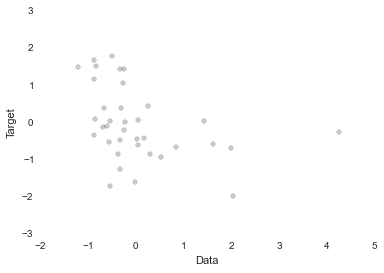

In [334]:
subX_train = X_train[:,0]
subX_test = X_test[:,0]
plt.scatter(subX_train, y_train, c="slategray", alpha=0.4, linewidths=0.3)
plt.xlabel('Data')
plt.ylabel('Target');

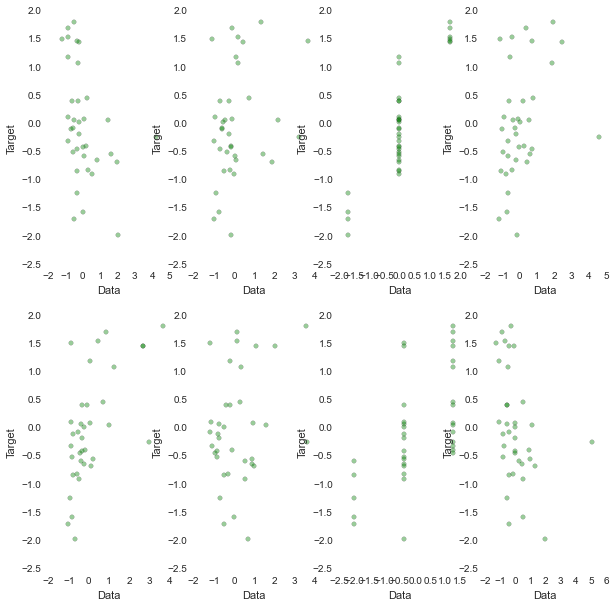

In [335]:
fig, axes = plt.subplots(2,4,figsize=(10,10))

for i in range(8):
    plt_i = i // 4
    plt_j = i % 4
    subX_train = X_train[:,i]
    axes[plt_i][plt_j].scatter(subX_train, y_train, c="green", alpha=0.4, linewidths=0.3)
    axes[plt_i][plt_j].set_xlabel('Data')
    axes[plt_i][plt_j].set_ylabel('Target'); 

In [336]:
print X_train.shape
lm.fit(X_train, y_train);

(36, 16)


In [337]:
# The mean square error
print("Training error: ", metrics.mean_squared_error(lm.predict(X_train),y_train))
print("Test     error: ", metrics.mean_squared_error(lm.predict(X_test),y_test))

('Training error: ', 0.032076716236766278)
('Test     error: ', 0.18809503925746127)


In [339]:

feature_names = dfNormal.columns
coefficients = lm.coef_

for i in range(len(coefficients)):
    print feature_names[i],"\t",coefficients[i]
intercept = lm.intercept_
print intercept

Average 	-0.367573603868
Business 	0.442599309159
Cleanliness 	0.335063884504
Couples 	0.4475579193
Excellent 	-0.516408137912
Families 	0.2019536166
Location 	0.1219220304
Poor 	-0.233048040818
Rooms 	0.1120381713
Service 	0.377295722631
Sleep Quality 	0.024216857994
Solo 	0.0932887724399
Terrible 	0.0881304590515
Total Reviews 	-0.365105398192
Value 	0.112996120271
Very good 	0.0783857970783
-0.0605457876413


In [340]:
print pd.DataFrame(zip(feature_names, np.transpose(coefficients)))

                0         1
0         Average -0.367574
1        Business  0.442599
2     Cleanliness  0.335064
3         Couples  0.447558
4       Excellent -0.516408
5        Families  0.201954
6        Location  0.121922
7            Poor -0.233048
8           Rooms  0.112038
9         Service  0.377296
10  Sleep Quality  0.024217
11           Solo  0.093289
12       Terrible  0.088130
13  Total Reviews -0.365105
14          Value  0.112996
15      Very good  0.078386


In [341]:
regr = linear_model.LinearRegression()
scores = cross_validation.cross_val_score(regr, X, y, cv=5)
print scores

[ 0.93126994  0.81623113  0.72396332  0.54574802  0.87541885]


In [342]:
print("Regression score: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Regression score: 0.78 (+/- 0.27)


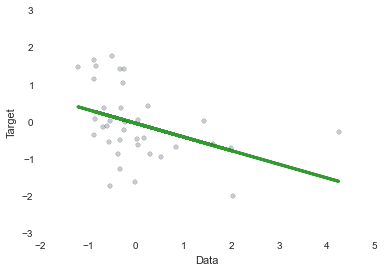

In [344]:
subX_train = X_train[:,0]
subX_test = X_test[:,0]
plt.scatter(subX_train, y_train, c="slategray", alpha=0.4, linewidths=0.3)
plt.plot(subX_train, (coefficients[0]*subX_train), color='green', linewidth=3, alpha=.8);
plt.xlabel('Data')
plt.ylabel('Target');

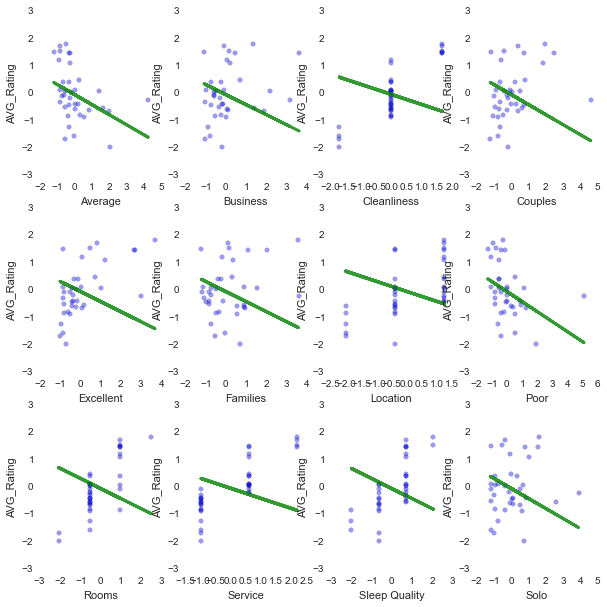

In [329]:
fig, axes = plt.subplots(3,4,figsize=(10,10))

for i in range(12):
    plt_i = i // 4
    plt_j = i % 4
    subX_train = X_train[:,i]
    axes[plt_i][plt_j].scatter(subX_train, y_train, c="blue", alpha=0.4, linewidths=0.3)
    axes[plt_i][plt_j].plot(subX_train, (coefficients[0]*subX_train), color='green', linewidth=3, alpha=.8);
    axes[plt_i][plt_j].set_xlabel(feature_names[i])
    axes[plt_i][plt_j].set_ylabel('AVG_Rating'); 


In [260]:
# Code for setting the style of the notebook
from IPython.core.display import HTML
def css_styling():
    styles = open("../../theme/custom.css", "r").read()
    return HTML(styles)
css_styling()